In [615]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA


In [616]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

Preprocessing

In [617]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [618]:
df.shape

(3140, 108)

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [620]:
print(df.isna().sum())

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64


In [621]:
pd.set_option('display.max_columns', None)

In [622]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,1

Removing Outliers using IQR (Inter Quartile Range)

In [623]:
#IQR = Quartile3 – Quartile1
#upper = Q3 +1.5*IQR
#lower = Q1 – 1.5*IQR
df_clean = df.copy()

for col in df.select_dtypes(np.number).columns: 
    Q1 = np.percentile(df[col],0.25)
    Q3 = np.percentile(df[col],0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df_clean = df[(df[col] >= lower) & (df[col] <= upper)] # Selection of outliers limit    

In [624]:
df_clean.shape

(68, 108)

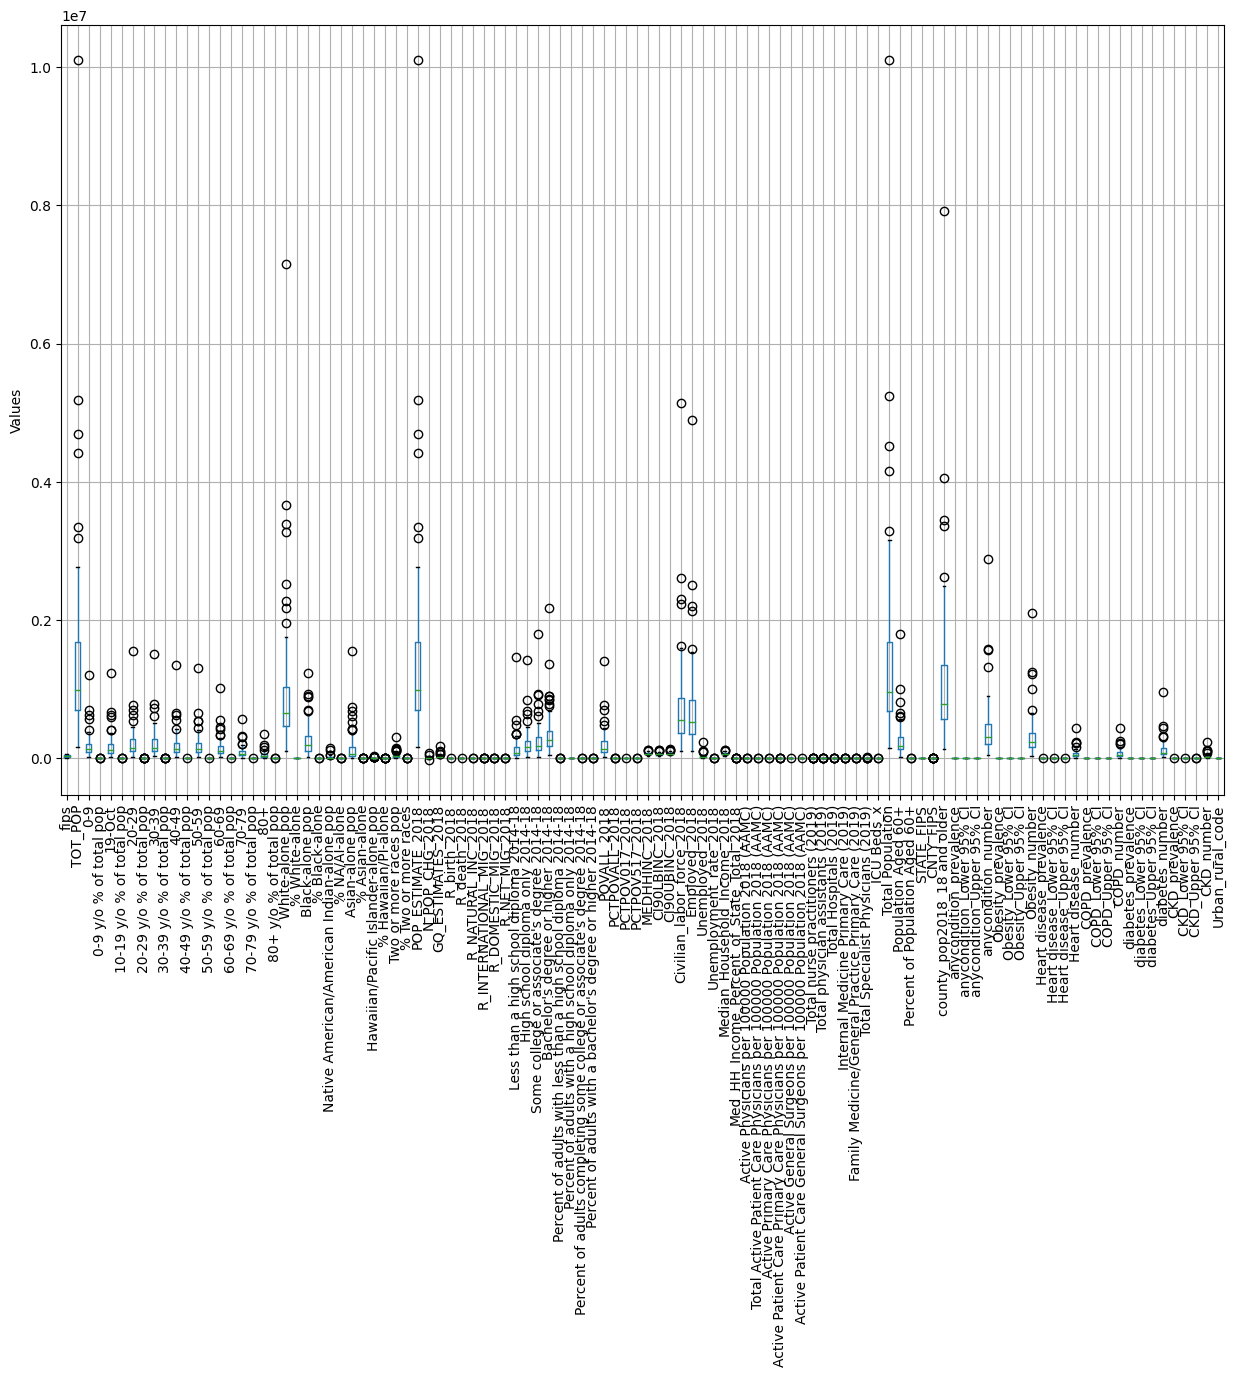

In [625]:
plt.figure(figsize=(15, 10))
numeric_cols = df_clean.select_dtypes(include='number').columns
df_clean[numeric_cols].boxplot()
plt.xticks(rotation=90) 
plt.ylabel('Values')
plt.savefig("/Users/nandapop/Documents/Bootcamp/regularized_linear_models/regularized_linear_models/data/processed/clean_df.png")
plt.show()

EDA

In [626]:
numerical_features = df_clean.select_dtypes(include=np.number) 

In [627]:
categorical_features = df_clean.select_dtypes(include=["object", "category"])

Feature Scaling

By applying feature scaling, it can be assured that your regularization will be work.

In [628]:
x = numerical_features.drop(columns=["Heart disease_number"], axis=1)
y = numerical_features["Heart disease_number"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train) # Fit the scaler trining data
scaled_x_test = scaler.transform(x_test) #transform test data
x_train.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
2535,48029,1986049,281600,14.178905,284659,14.332929,308094,15.512910,298637,15.036739,249508,12.563033,225144,11.336276,179542,9.040160,102918,5.182047,55947,2.817000,1675380,84.357435,169699,8.544553,24235,1.220262,65187,3.282245,4496,0.226379,47052,2.369126,1986049,27208,42261,14.0,7.0,7.1,2.6,4.1,6.7,197870,308714,379838,337748,16.2,25.2,31.0,27.6,334215,17.2,23.7,22.0,54210,52804,55616,940900,909581,31319,3.3,54210,89.4,224.8,199.9,72.9,66.5,6.2,5.4,685.039066,404.311441,36.189438,751.467097,665.110657,2345.601441,648,1892004,307269,16.2,48,29,1478380,47.1,45.4,48.8,696450,37.7,36.5,38.8,557349,6.6,6.1,7.1,5.7,5.1,6.4,84995,13.4,12.6,14.2,198276,3.1,2.9,3.3,45733,1
2563,48085,1005146,133960,13.327417,151546,15.077014,117972,11.736802,147122,14.636879,162184,16.135367,132755,13.207534,87556,8.710774,50461,5.020266,21590,2.147947,704031,70.042660,105939,10.539663,7017,0.698108,159619,15.880181,966,0.096105,27574,2.743283,1005146,33753,4394,11.3,4.8,6.5,5.5,22.1,27.6,39131,91405,167196,318998,6.3,14.8,27.1,51.7,64180,6.4,6.7,6.3,96936,93514,100358,545243,527191,18052,3.3,96936,159.9,224.8,199.9,72.9,66.5,6.2,5.4,346.700548,204.623364,18.315595,380.319996,336.614714,1187.116686,195,914075,135322,14.8,48,85,744670,34.5,32.8,36.1,256993,26.7,25.6,27.9,198827,5.0,4.6,5.5,4.6,3.9,5.4,34176,9.2,8.6,9.8,68319,2.3,2.2,2.4,17085,1
2243,42003,1218452,126101,10.349279,133548,10.960465,169875,13.941871,171345,14.062515,135862,11.150

Acording to scikit-learn.org: Dimensional reduction using PCA consists of finding the features that maximize the variance. If one feature varies more than the others only because of their respective scales, PCA would determine that such feature dominates the direction of the principal components.

Model Optimization

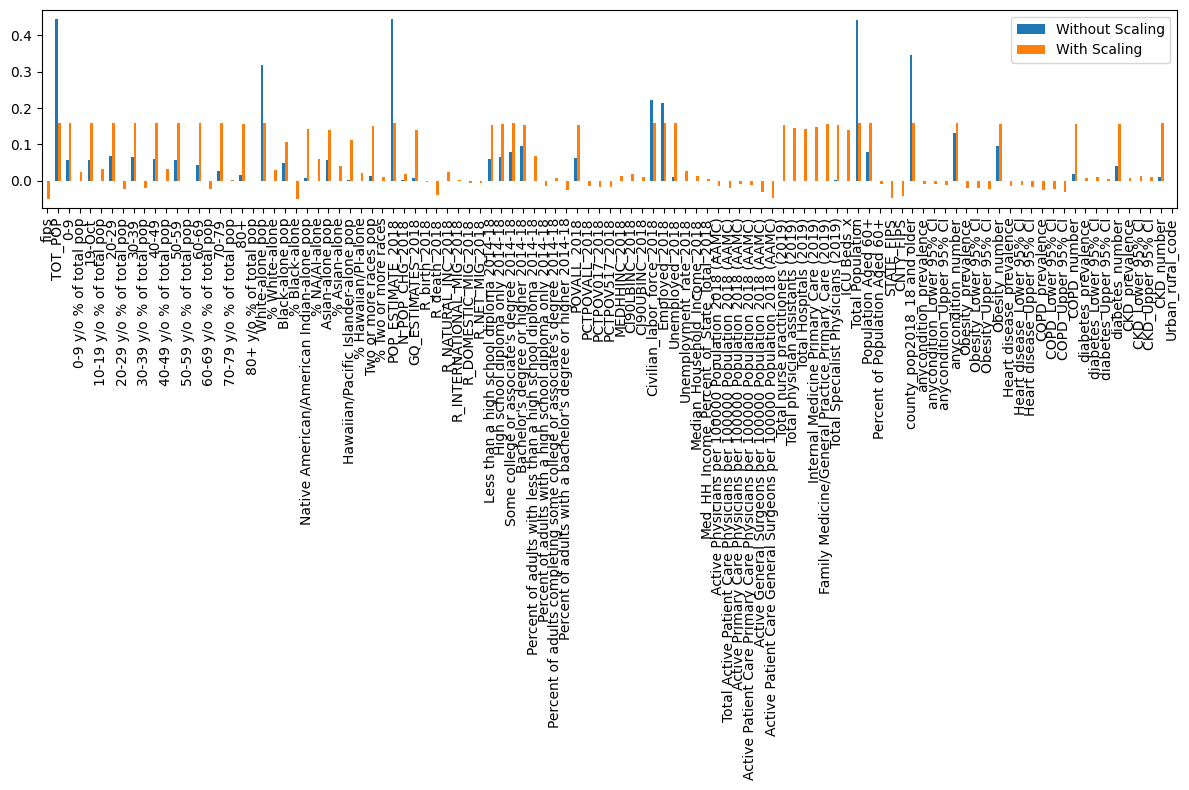

In [629]:
pca = PCA(n_components=2).fit(x_train) #PCA  maximize the variance in the data (data points differ from the mean)

scaled_pca = PCA(n_components=2).fit(scaled_x_train)
x_train_transformed = pca.transform(x_train)
x_train_pca = scaled_pca.transform(scaled_x_train)
x_test_pca = scaled_pca.transform(scaled_x_test)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=x_train.columns, columns=["Without Scaling"]
)
first_pca_component["With Scaling"] = scaled_pca.components_[0]

first_pca_component.plot.bar(figsize=(12, 8)
)
plt.tight_layout()
plt.savefig("/Users/nandapop/Documents/Bootcamp/regularized_linear_models/regularized_linear_models/data/processed/modelOptimizationPCA.png")
plt.show()

In [630]:
print("x_train_transformed PCA", x_train_transformed)
print("x_train_pca PCA", x_train_pca)
print("x_test_pca PCA", x_test_pca)

x_train_transformed PCA [[ 9.72790658e+05 -3.02970223e+05]
 [-1.28938735e+06 -1.83779428e+05]
 [-6.70327117e+05 -1.72274478e+05]
 [ 3.98440251e+06 -3.96358908e+05]
 [-1.08794045e+06  9.71834296e+04]
 [ 1.45501944e+06 -8.16141291e+04]
 [-1.39583840e+06 -1.49605598e+05]
 [ 8.15260404e+06  5.61550875e+05]
 [-5.78906492e+05  8.14271201e+03]
 [-1.97889916e+06 -8.75458133e+04]
 [-1.63226183e+06 -2.21829582e+05]
 [-2.81627255e+06 -7.75589748e+02]
 [-1.38652032e+06  6.46618164e+04]
 [-2.96217124e+06 -3.89435036e+04]
 [ 1.54618249e+06  3.79316009e+05]
 [ 1.92540643e+07 -2.06054844e+05]
 [-1.23843710e+06 -1.94804770e+05]
 [-2.25700033e+06 -7.35124678e+04]
 [-1.48018138e+06 -1.12961039e+05]
 [-6.90037399e+05  1.30085450e+05]
 [-1.24715773e+05 -6.44045785e+04]
 [ 2.34914143e+06  1.83840878e+05]
 [ 1.50732237e+06 -2.33313056e+05]
 [ 2.78639275e+06 -8.48849121e+04]
 [-6.46510383e+05 -1.79302543e+05]
 [ 3.61489664e+05  4.58673043e+05]
 [-1.68154607e+06 -1.58326910e+04]
 [-1.37460568e+06  3.71097857e+

In [631]:
lr = LinearRegression().fit(x_train_pca, y_train)

In [632]:
y_train_predictions = lr.predict(x_train_pca)
y_train_predictions

array([ 97195.10553525,  34036.36184245,  60747.36425608, 146919.94689733,
        45256.92397391, 111847.69566667,  49860.9904959 , 236305.46103195,
        59148.10108924,  29202.31813541,  32648.40034977,  24268.22291414,
        54028.83714087,  14039.29564357, 113450.01081508, 449717.2165732 ,
        58965.18989731,  28651.80296547,  29548.27994732,  72820.72958005,
        77947.69197843, 119712.85235109,  89464.64815564, 136446.57140761,
        49448.3047288 , 101311.73057481,  34079.28488495,  51482.14132675,
        46926.36650431,  45799.17640084,  13134.69775849,  89357.95061652,
       124275.54785866,  40031.41915706,  41271.73766419,  53981.68175222,
       203067.3677119 ,  47026.58776593,  71274.87563576,  -6703.76118882,
        72383.23219437,  95703.49707213,  32675.86478114,  40160.38180601,
        45413.41727254,  26405.65941042,  30731.28456078,  45658.3199293 ,
       205804.38048091,  39529.40403438,  54064.37486023,  48978.5453233 ,
        72202.88855978,  

In [633]:
y_test_predictions = lr.predict(x_test_pca)
y_test_predictions

array([ 44553.49597394,  66380.69662329, 136656.68448104,  76082.94662099,
        26006.86244551,  25564.44273823,  92219.54689239, 117192.64918773,
       -11077.31543131,  17935.00964866,  32974.09993646,  15977.47291446,
        52622.02996298,  43764.67475149])

Train  residuals: 2535    -181.105535
2563    3418.638158
2243    6464.635744
220    -7196.946897
1947    -296.923974
Name: Heart disease_number, dtype: float64
Test residuals: 2071    2260.504026
365     -315.696623
213     1055.315519
226    -8425.946621
1373   -2509.862446
Name: Heart disease_number, dtype: float64


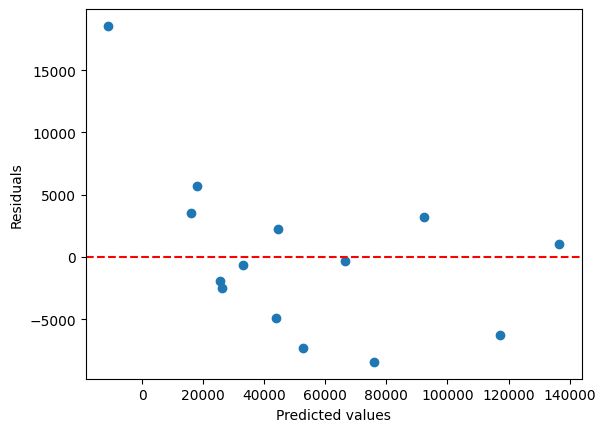

In [634]:
train_residuals = y_train - y_train_predictions
test_residuals = y_test - y_test_predictions
print("Train  residuals:", train_residuals.head())
print("Test residuals:", test_residuals.head())
plt.scatter(y_test_predictions, test_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


Calculate metrics to evaluate the regression model

In [635]:
test_mse = mean_squared_error(y_test, y_test_predictions)

In [636]:
test_r2 = r2_score(y_test, y_test_predictions)

In [637]:
test_mae = mean_absolute_percentage_error(y_test, y_test_predictions)

In [638]:
print("MSE:", test_mse)
print("R2 Score:",test_r2)
print("Mean absolute porc error",test_mae )

MSE: 43124084.736266255
R2 Score: 0.968592652023912
Mean absolute porc error 0.2624017661255245


Model Optimization

In [639]:
alpha = 1.0
lasso_model = Lasso(alpha = alpha)

lasso_model.fit(x_train_pca, y_train)
score = lasso_model.score(x_test_pca, y_test)
y_pred_lasso = lasso_model.predict(x_test_pca)
print("Coefficients: ", lasso_model.coef_)
print("R2 score lasso:", score)


Coefficients:  [11181.57187229 -2061.38844174]
R2 score lasso: 0.96859395941494


L2 Regularization

In [640]:
ridge_model = Ridge(alpha = 0.1, max_iter = 300)
ridge_model.fit(x_train_pca, y_train)
score_r = ridge_model.score(x_test_pca, y_test)
y_pred_ridge = ridge_model.predict(x_test_pca)
print("Coefficients: ", ridge_model.coef_)
print("R2 score ridge model:", score_r)


Coefficients:  [11181.06484546 -2061.28171397]
R2 score ridge model: 0.9686027556010005


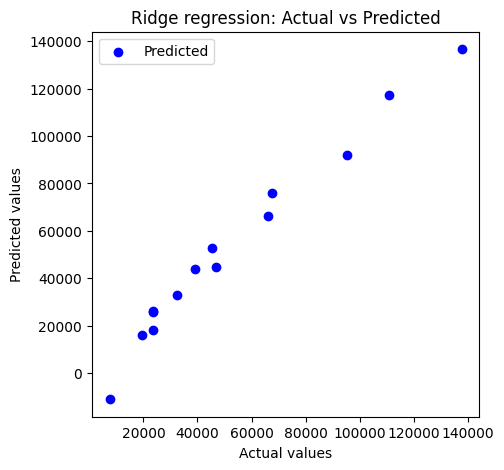

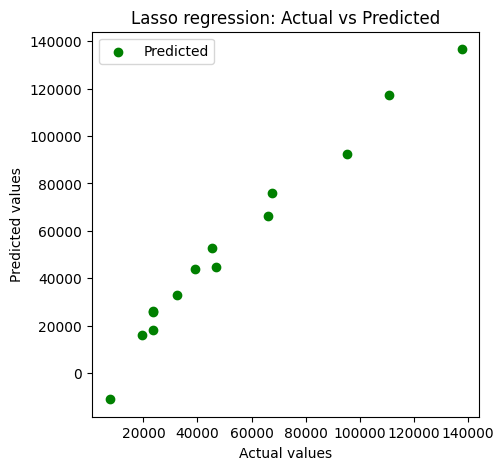

In [641]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted')
plt.title('Ridge regression: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.savefig("/Users/nandapop/Documents/Bootcamp/regularized_linear_models/regularized_linear_models/data/processed/ridge_regression.png")
plt.show()

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_lasso, color='green', label='Predicted')
plt.title('Lasso regression: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.savefig("/Users/nandapop/Documents/Bootcamp/regularized_linear_models/regularized_linear_models/data/processed/lasso_regresion.png")
plt.show()

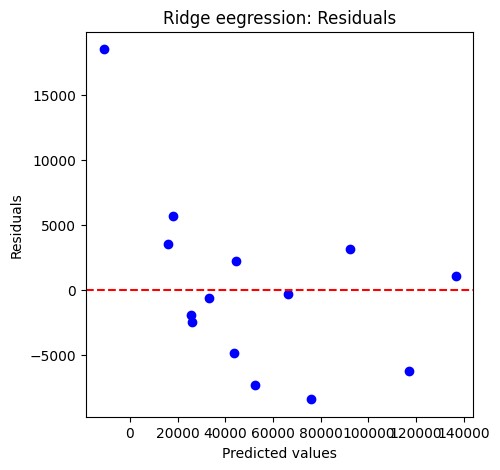

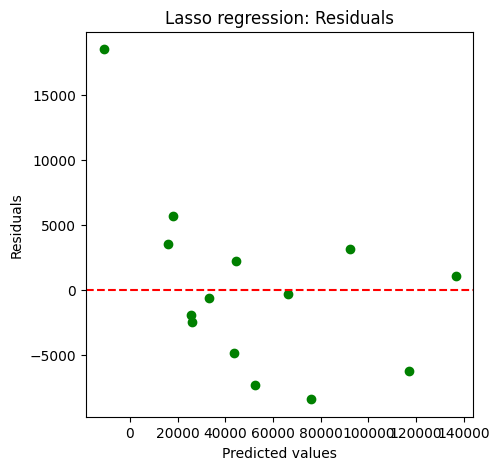

In [642]:
plt.figure(figsize=(5, 5))
ridge_residuals = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, ridge_residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Ridge eegression: Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.savefig("/Users/nandapop/Documents/Bootcamp/regularized_linear_models/regularized_linear_models/data/processed/ridge_residuals.png")
plt.show()

plt.figure(figsize=(5, 5))
lasso_residuals = y_test - y_pred_lasso
plt.scatter(y_pred_lasso, lasso_residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Lasso regression: Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.savefig("/Users/nandapop/Documents/Bootcamp/regularized_linear_models/regularized_linear_models/data/processed/lasso_regression.png")
plt.show()

In [643]:
x_train.to_csv("/Users/nandapop/Documents/Bootcamp/regularized_linear_models/regularized_linear_models/data/processed/x_train.csv")
y_train.to_csv("/Users/nandapop/Documents/Bootcamp/regularized_linear_models/regularized_linear_models/data/processed/y_train.csv")
x_test.to_csv("/Users/nandapop/Documents/Bootcamp/regularized_linear_models/regularized_linear_models/data/processed/x_test.csv")
y_test.to_csv("/Users/nandapop/Documents/Bootcamp/regularized_linear_models/regularized_linear_models/data/processed/y_test.csv")